In [1]:
%matplotlib inline
%config InlineBackend.figure_format = True
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
from astropy.utils.console import ProgressBar
import astropy.units as u

import sys
sys.path.insert(0, '../')
from mrspoc import Star, Spot

In [14]:
lines = open('candidates.tex', 'r').read().splitlines()[4:-2]

snr = []
names = []
for line in lines:
    snr.append(line.split('&')[-3].strip())
    names.append(line.split('&')[0].strip())

Combined histogram

In [36]:
kic_sn = np.load('kic7174505_sn.npy')
gj_sn = np.load('gj1243_sn.npy')
sun_sn = np.load('sun_sn.npy')

/Users/bmmorris/anaconda/lib/python3.5/site-packages/matplotlib/text.py:2141: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


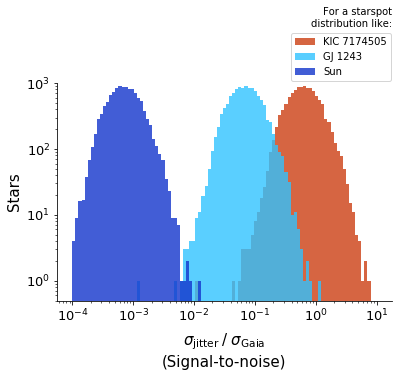

In [97]:
bins = np.logspace(-4, 1, 100)

#plt.figure(figsize=(12, 5))
alpha=0.8
plt.hist(kic_sn, bins, histtype='stepfilled', alpha=alpha, label='KIC 7174505', 
         log=True, color="#CC3F13")
plt.hist(gj_sn, bins, lw=3, histtype='stepfilled', alpha=alpha, label='GJ 1243', 
         log=True, color="#31C3FF")
plt.hist(sun_sn, bins, histtype='stepfilled', alpha=alpha, label='Sun', 
         log=True, color="#1335CC")

plt.annotate("For a starspot\ndistribution like:", xy=(1.0, 1.25),
             textcoords='axes fraction', ha='right', va='bottom')
plt.legend(loc=(0.7, 1.01))
#plt.legend(loc=(1.01, 0.))
plt.gca().set_xscale("log")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('$\sigma_{\mathrm{jitter}} \; / \; \sigma_{\mathrm{Gaia}}$\n(Signal-to-noise)', 
           fontsize=15)
plt.ylabel('Stars', fontsize=15)
plt.ylim([0.5, 1e3])
plt.setp(plt.gca().get_xticklabels(), fontsize=13)
plt.setp(plt.gca().get_yticklabels(), fontsize=13)
plt.savefig('summary.pdf', bbox_inches='tight')
plt.show()